<a href="https://colab.research.google.com/github/a-smaruj/Machine-learning-finance-classes/blob/use-case-1/Use_case_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

## Load data

In [2]:
data = pd.read_csv('case1.csv', sep =';')
data.head()

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


## Data cleaning

### Explore data

In [3]:
# How many records
data.shape

(9841, 51)

In [4]:
data.describe()

,Unnamed: 0,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,4920.000000,1815.049893,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,2840.996333,1222.621830,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,2460.000000,821.000000,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,4920.000000,1641.000000,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,7380.000000,2601.000000,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,9840.000000,4729.000000,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


In [5]:
data.columns

Index(['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance', 'Total ERC20 tnxs',
       'ERC20 total Ether received', 'ERC20 total ether sent',
       'ERC20 total Ether sent contract', 'ERC20 uniq sent addr',
       'ERC20 uniq rec addr', 'ERC20 uniq sent addr.1',
       'ERC20 uniq rec contract addr', 'ERC20 avg time between sent tnx',
       'ERC20 avg time b

In [6]:
data.dtypes

Unnamed: 0                                                int64
Index                                                     int64
Address                                                  object
FLAG                                                      int64
Avg min between sent tnx                                float64
Avg min between received tnx                            float64
Time Diff between first and last (Mins)                 float64
Sent tnx                                                  int64
Received Tnx                                              int64
Number of Created Contracts                               int64
Unique Received From Addresses                            int64
Unique Sent To Addresses                                  int64
min value received                                      float64
max value received                                      float64
avg val received                                        float64
min val sent                            

### Remove unnecessary columns

In [7]:
# Check if a column has a unique values
for col in data.columns:
  print(col, ': ', pd.unique(data[col]), '\n')

Unnamed: 0 :  [   0    1    2 ... 9838 9839 9840] 

Index :  [   1    2    3 ... 4727 4728 4729] 

Address :  ['0x00009277775ac7d0d59eaad8fee3d10ac6c805e8'
 '0x0002b44ddb1476db43c868bd494422ee4c136fed'
 '0x0002bda54cb772d040f779e88eb453cac0daa244' ...
 '0xff8e6af02d41a576a0c82f7835535193e1a6bccc'
 '0xffde23396d57e10abf58bd929bb1e856c7718218'
 '0xd624d046edbdef805c5e4140dce5fb5ec1b39a3c'] 

FLAG :  [0 1] 

Avg min between sent tnx :  [   844.26  12709.07 246194.54 ...  12635.1    2499.44  37242.7 ] 

Avg min between received tnx :  [1093.71 2958.44 2434.02 ...  631.39 2189.29  149.56] 

Time Diff between first and last (Mins) :  [ 704785.63 1218216.73  516729.3  ...   58748.48  261601.88  670817.33] 

Sent tnx :  [  721    94     2    25  4598   213     1     8    10     0     7    32
    34    57    26     3     5    82     4    59  5970    68  9996     9
    13    33     6    11  2217    12    35   181    48  3424    17    14
    30   124    24   121    21    23    16  1156    87    4

In [8]:
# Columns with only 0. and nan
col1 = ['ERC20 avg val sent contract', 'ERC20 max val sent contract', 'ERC20 min val sent contract', 'ERC20 avg time between sent tnx', 'ERC20 avg time between rec tnx',
 'ERC20 avg time between rec 2 tnx' , 'ERC20 avg time between contract tnx']

# Columns with unsignificant information
col2 = ['Unnamed: 0', 'Index', 'Address']

col = col1 + col2

data = data.drop(columns=col)
data.head()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,0.0,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,39.0,57.0,Cofoundit,Numeraire
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,0.0,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,1.0,7.0,Livepeer Token,Livepeer Token
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,0.0,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,8.0,None,XENON
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,0.0,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,1.0,11.0,Raiden,XENON
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,0.0,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,6.0,27.0,StatusNetwork,EOS


### NA values

In [9]:
# How many null/na values
data.isnull().sum() * 100 / len(data)

FLAG                                                    0.000000
Avg min between sent tnx                                0.000000
Avg min between received tnx                            0.000000
Time Diff between first and last (Mins)                 0.000000
Sent tnx                                                0.000000
Received Tnx                                            0.000000
Number of Created Contracts                             0.000000
Unique Received From Addresses                          0.000000
Unique Sent To Addresses                                0.000000
min value received                                      0.000000
max value received                                      0.000000
avg val received                                        0.000000
min val sent                                            0.000000
max val sent                                            0.000000
avg val sent                                            0.000000
min value sent to contrac

<Axes: >

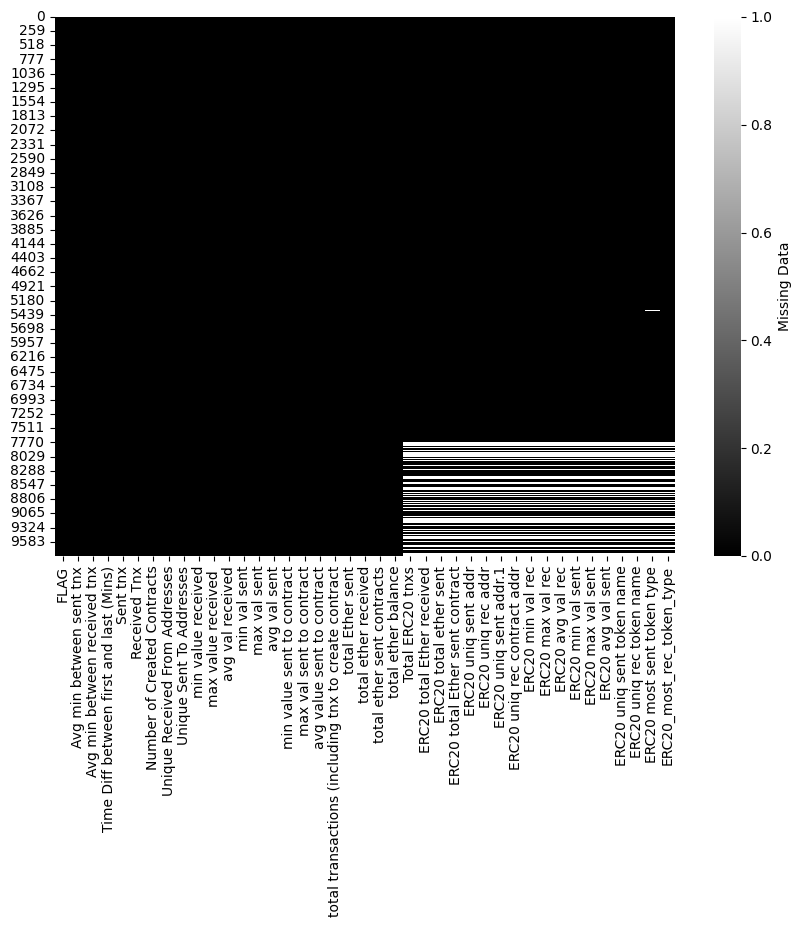

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(data.isna(),
            cmap="binary_r",
            cbar_kws={'label': 'Missing Data'})

In [11]:
data = data.dropna()
len(data)

8981

### Explanatory variable

In [12]:
data.groupby(['FLAG'])['FLAG'].count() * 100 / len(data)

FLAG
0    84.968266
1    15.031734
Name: FLAG, dtype: float64

In [13]:
# data['FLAG'].replace(0, 'Not fraud', inplace=True)
# data['FLAG'].replace(1, 'Fraud', inplace=True)
# data.head()

### Outlier values

In [14]:
for col in data.columns[1:-2]:
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3 - Q1
  df = data.copy()
  df = df.drop(df.loc[df[col] > (Q3 + 1.5 * IQR)].index)
  n = (len(data) - len(df)) * 100 / len(data)
  print(f'Percentage of outliers in column \'{col}\' is {round(n, 2)}')

Percentage of outliers in column 'Avg min between sent tnx' is 20.92
Percentage of outliers in column 'Avg min between received tnx' is 13.43
Percentage of outliers in column 'Time Diff between first and last (Mins)' is 9.29
Percentage of outliers in column 'Sent tnx' is 17.44
Percentage of outliers in column 'Received Tnx' is 17.77
Percentage of outliers in column 'Number of Created Contracts' is 13.39
Percentage of outliers in column 'Unique Received From Addresses' is 11.25
Percentage of outliers in column 'Unique Sent To Addresses' is 16.61
Percentage of outliers in column 'min value received' is 21.65
Percentage of outliers in column 'max value received ' is 9.51
Percentage of outliers in column 'avg val received' is 14.91
Percentage of outliers in column 'min val sent' is 14.45
Percentage of outliers in column 'max val sent' is 9.87
Percentage of outliers in column 'avg val sent' is 6.59
Percentage of outliers in column 'min value sent to contract' is 0.02
Percentage of outliers 

In [15]:
df = data.copy()

for col in df.columns[1:-2]:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  df = df.drop(df.loc[df[col] > (Q3 + 10 *  IQR)].index)
  df = df.drop(df.loc[df[col] < (Q1 - 10 *  IQR)].index)

print('Percentage left after removing outliers', len(df) * 100/ len(data))

Percentage left after removing outliers 33.103217904464984


In [16]:
df = data.copy()

# Remove outliers by expert method
df = df.drop(df.loc[df['Avg min between sent tnx'] >= 300000].index)
df = df.drop(df.loc[df['Avg min between received tnx'] >= 300000].index)
df = df.drop(df.loc[df['Sent tnx'] >= 7000].index)
df = df.drop(df.loc[df['Received Tnx'] >= 6000].index)
df = df.drop(df.loc[df['Number of Created Contracts'] >= 6000].index)
df = df.drop(df.loc[df['Unique Received From Addresses'] >= 6000].index)
df = df.drop(df.loc[df['Unique Sent To Addresses'] >= 4000].index)
df = df.drop(df.loc[df['min value received'] >= 4000].index)
df = df.drop(df.loc[df['max value received '] >= 100000].index)
df = df.drop(df.loc[df['avg val received'] >= 50000].index)
df = df.drop(df.loc[df['min val sent'] >= 1000].index)
df = df.drop(df.loc[df['max val sent'] >= 100000].index)
df = df.drop(df.loc[df['avg val sent'] >= 4000].index)
df = df.drop(df.loc[df['min value sent to contract'] >= 0.005].index)
df = df.drop(df.loc[df['max val sent to contract'] >= 0.005].index)
df = df.drop(df.loc[df['avg value sent to contract'] >= 0.005].index)
df = df.drop(df.loc[df['total transactions (including tnx to create contract'] >= 11000].index)
df = df.drop(df.loc[df['total Ether sent'] >= 1].index)
df = df.drop(df.loc[df['total ether received'] >= 1].index)
df = df.drop(df.loc[df['total ether sent contracts'] >= 0.005].index)
df = df.drop(df.loc[df['total ether balance'] >= 0.5].index)
df = df.drop(df.loc[df['total ether balance'] < -0.25].index)
df = df.drop(df.loc[df['Total ERC20 tnxs'] >= 5000].index)
df = df.drop(df.loc[df['ERC20 total Ether received'] >= 0.2].index)
df = df.drop(df.loc[df['ERC20 total ether sent'] >= 0.2].index)
df = df.drop(df.loc[df['ERC20 total Ether sent contract'] >= 100000].index)
df = df.drop(df.loc[df['ERC20 uniq sent addr'] >= 3000].index)
df = df.drop(df.loc[df['ERC20 uniq rec addr'] >= 2000].index)
df = df.drop(df.loc[df['ERC20 uniq sent addr.1'] >= 0.5].index)
df = df.drop(df.loc[df['ERC20 uniq rec contract addr'] >= 300].index)
df = df.drop(df.loc[df['ERC20 min val rec'] >= 0.3].index)
df = df.drop(df.loc[df['ERC20 max val rec'] >= 0.2].index)
df = df.drop(df.loc[df['ERC20 avg val rec'] >= 0.25].index)
df = df.drop(df.loc[df['ERC20 min val sent'] >= 0.2].index)
df = df.drop(df.loc[df['ERC20 max val sent'] >= 0.2].index)
df = df.drop(df.loc[df['ERC20 avg val sent'] >= 1].index)
df = df.drop(df.loc[df['ERC20 uniq sent token name'] >= 150].index)
df = df.drop(df.loc[df['ERC20 uniq rec token name'] >= 300].index)

print('Percentage left after removing outliers', len(df) * 100/ len(data))

Percentage left after removing outliers 6.703039750584567


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/tools.py:227: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(**fig_kw)


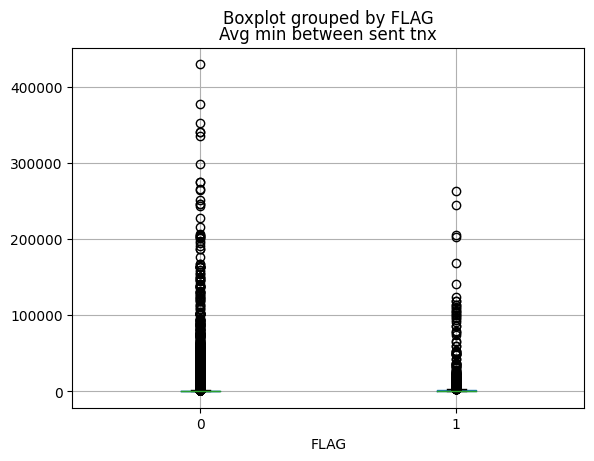

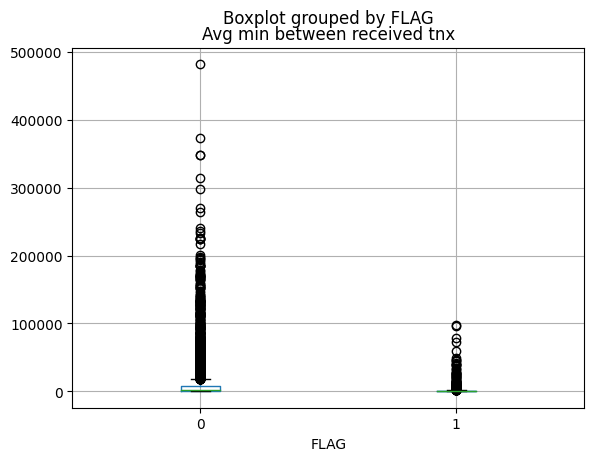

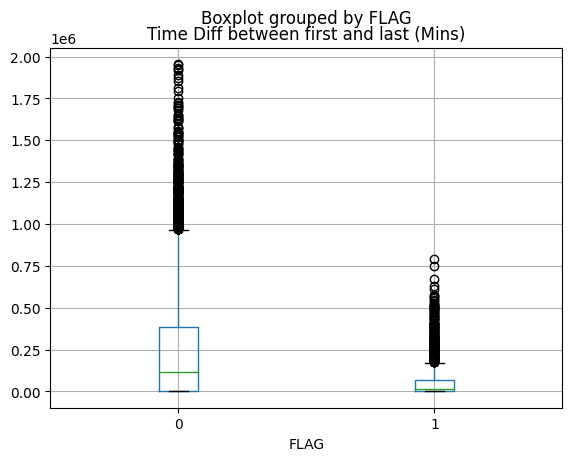

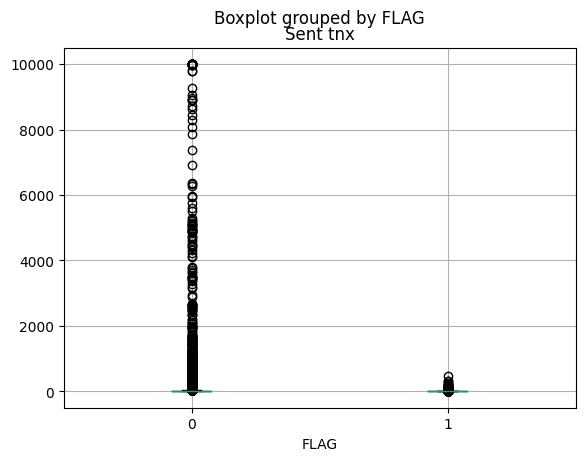

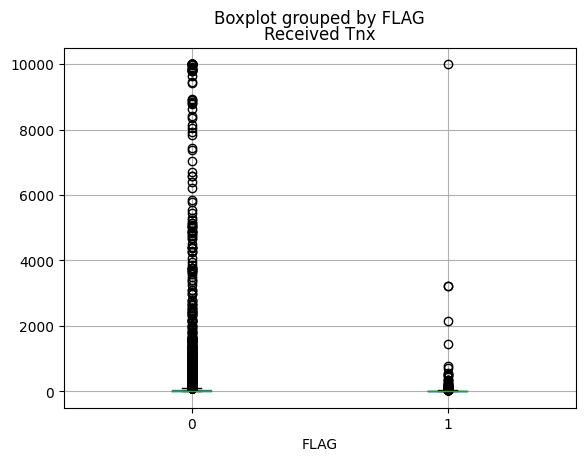

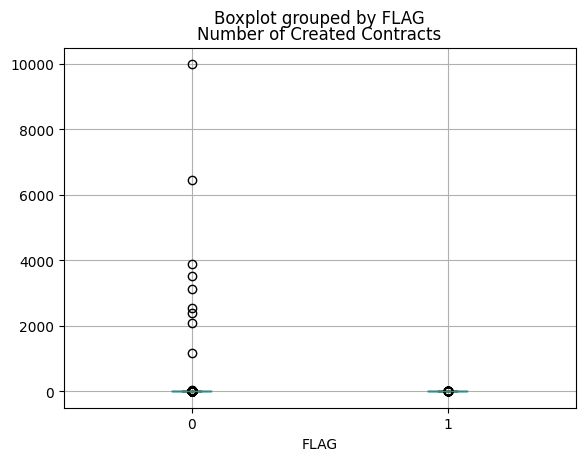

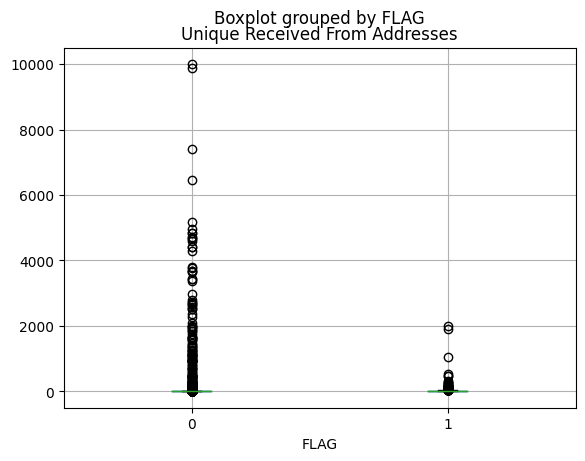

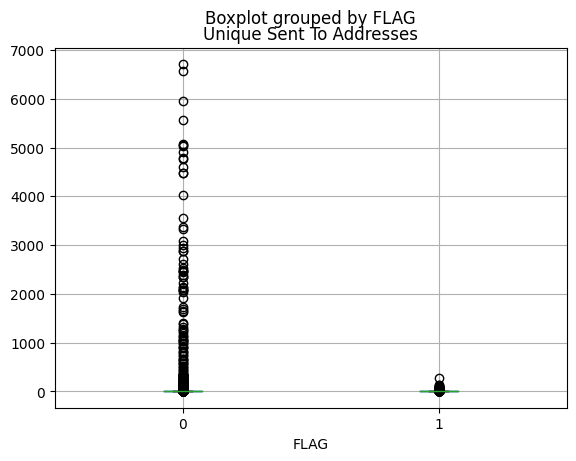

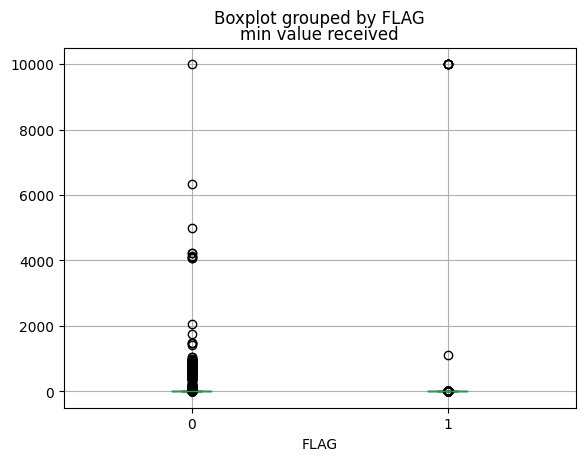

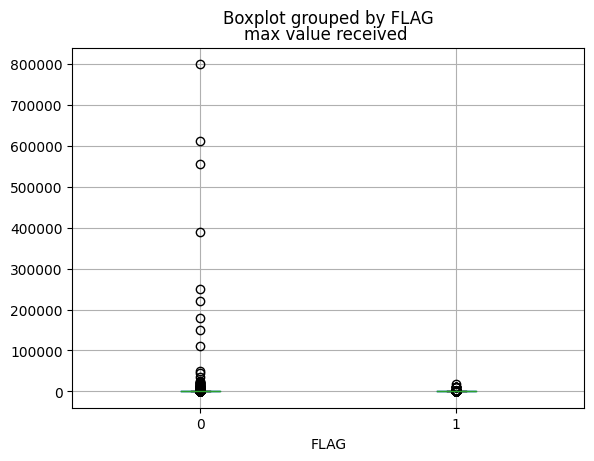

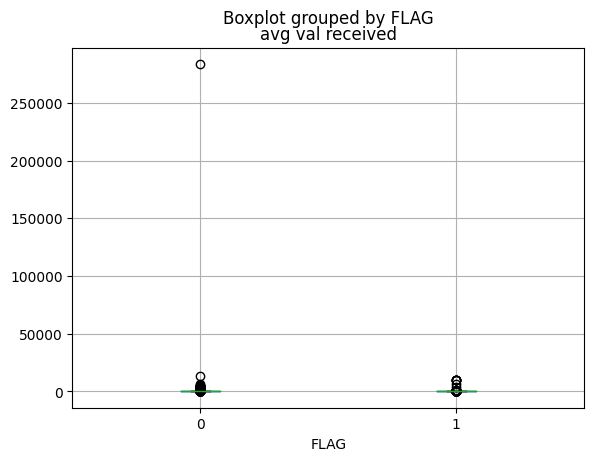

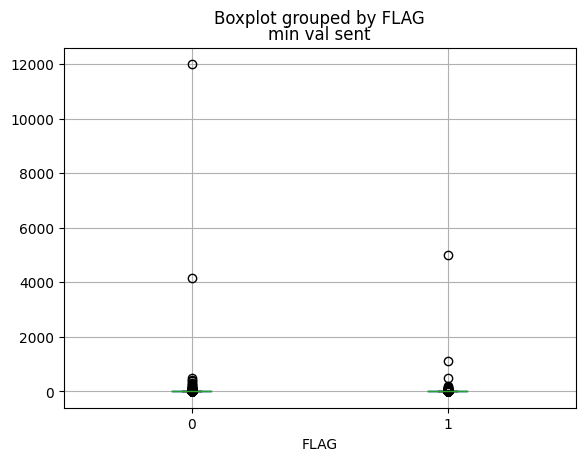

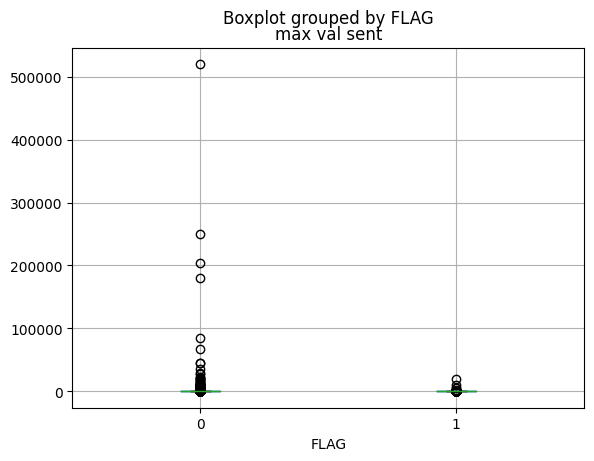

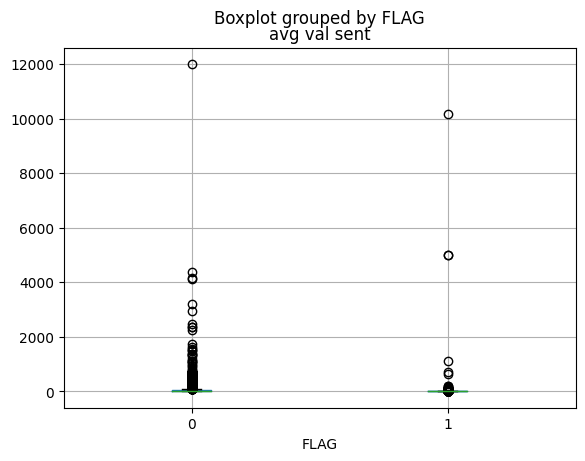

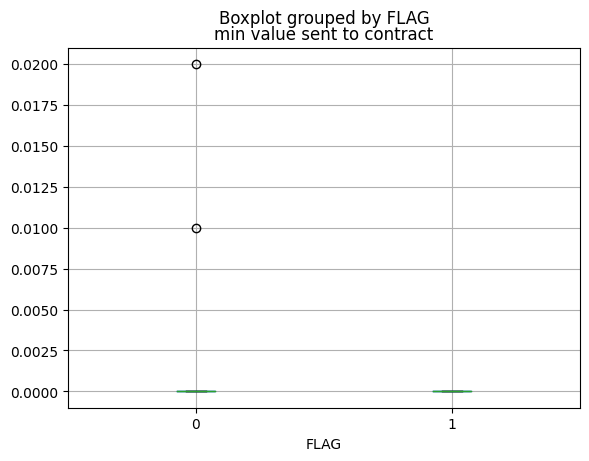

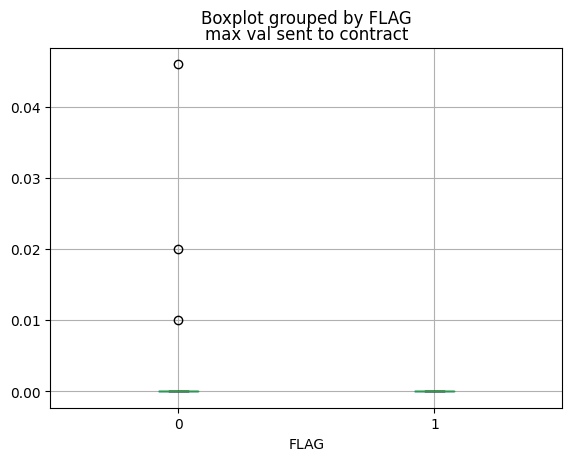

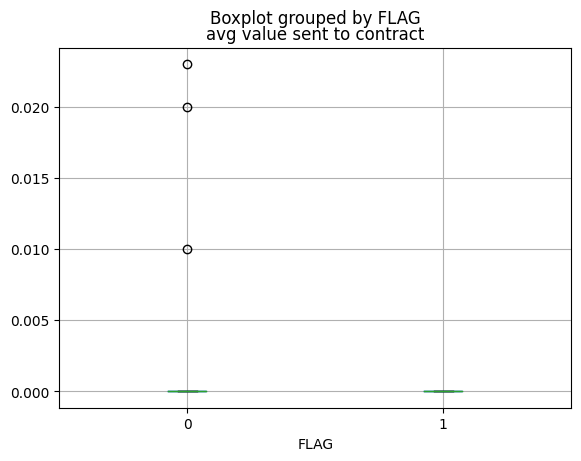

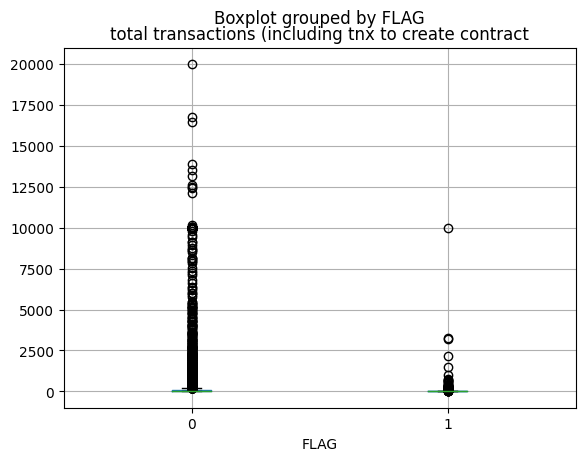

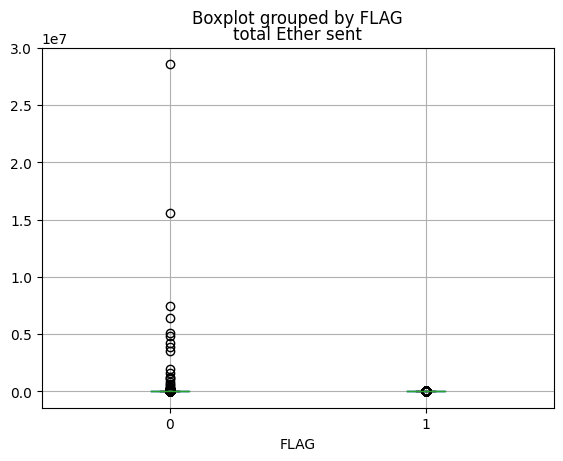

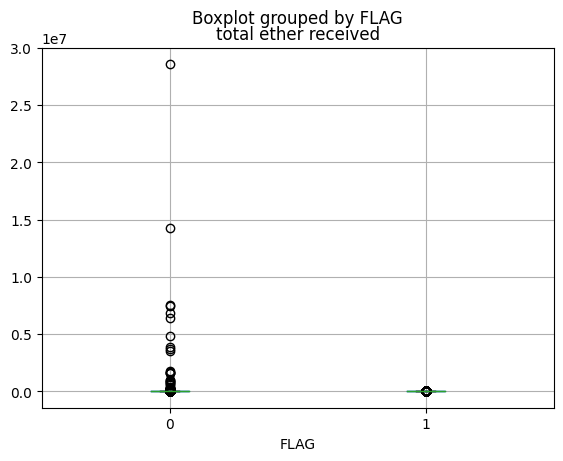

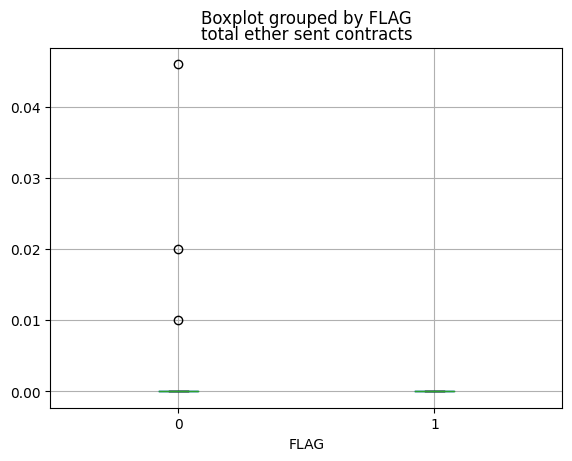

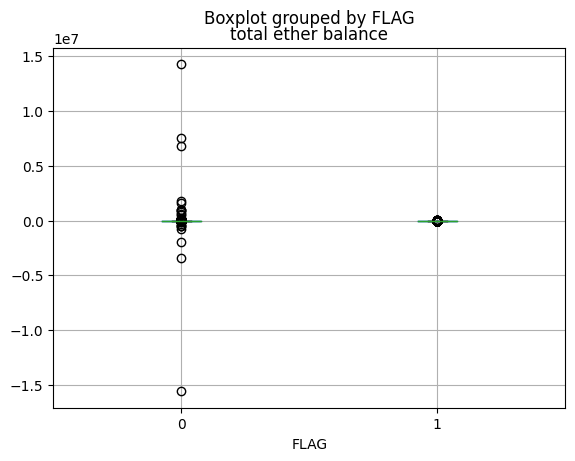

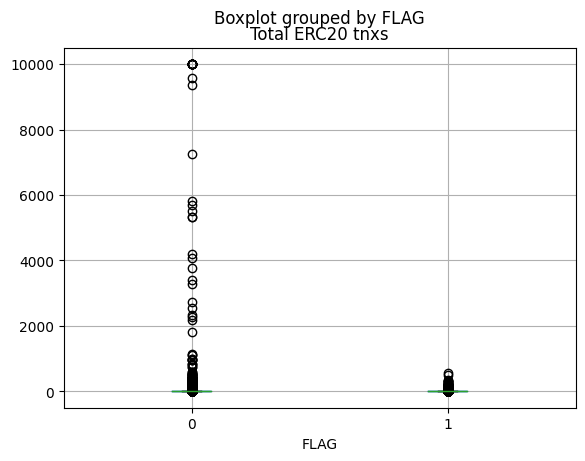

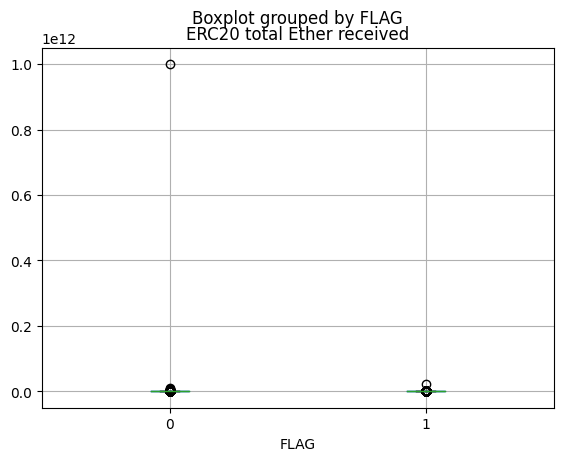

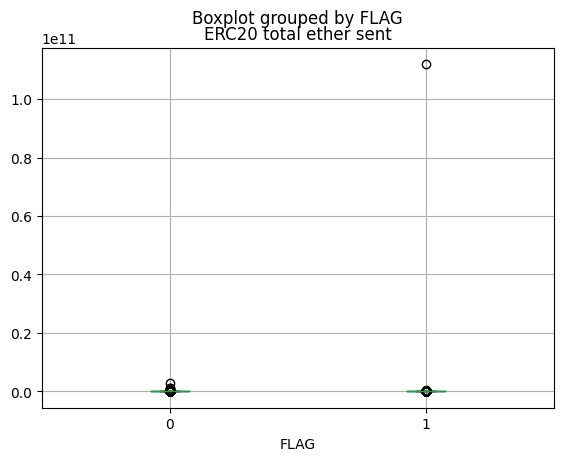

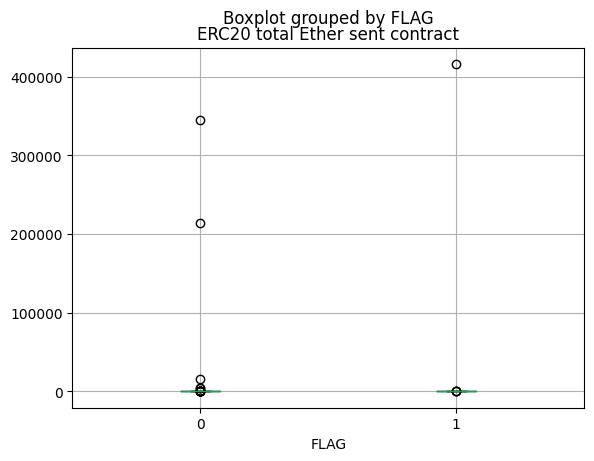

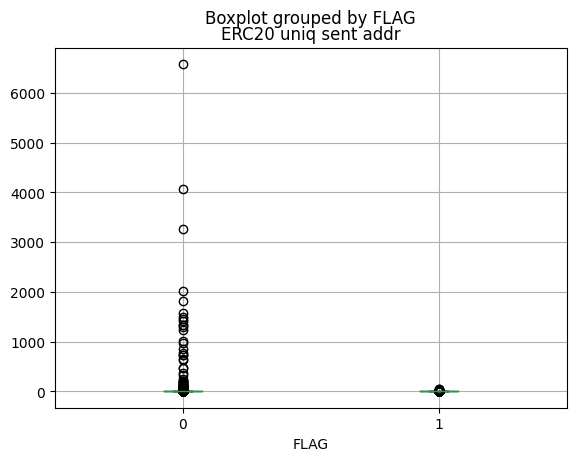

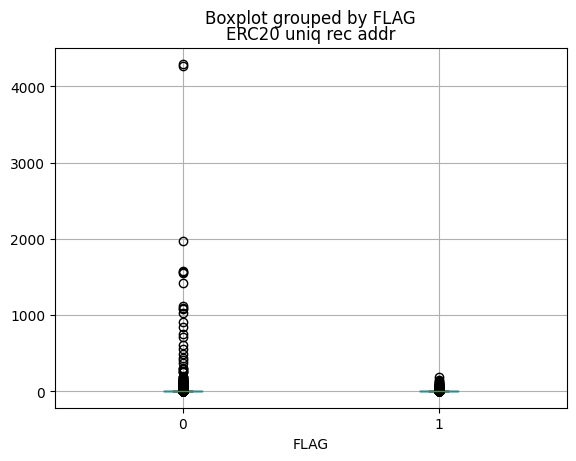

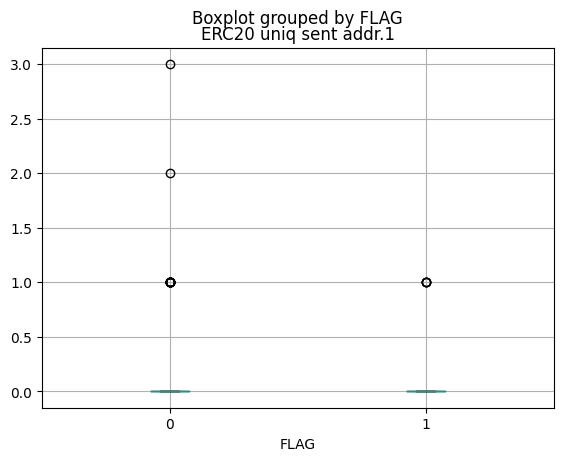

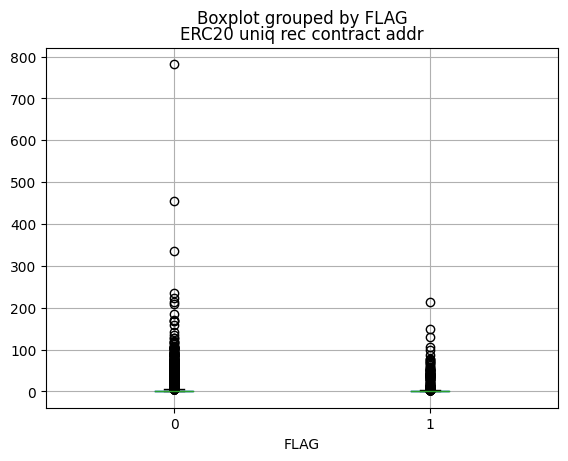

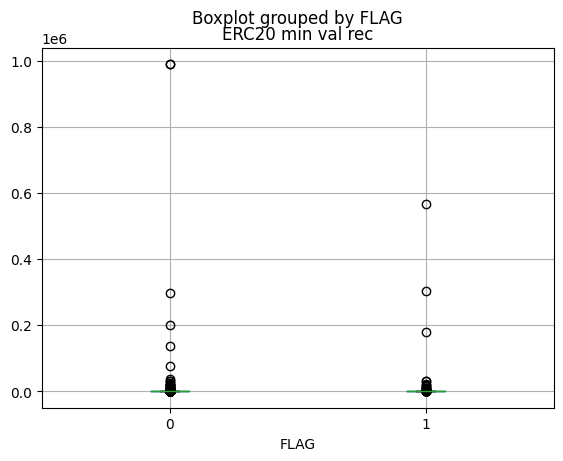

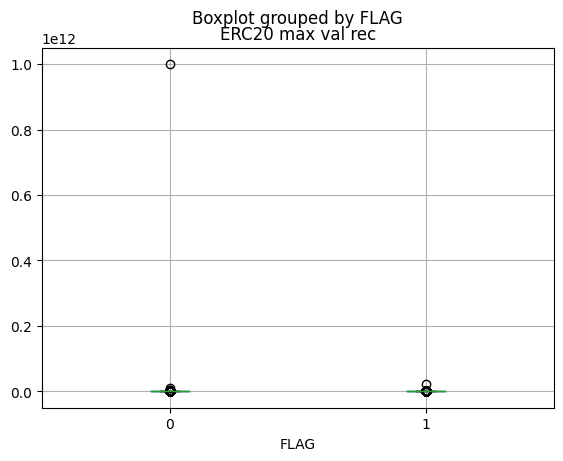

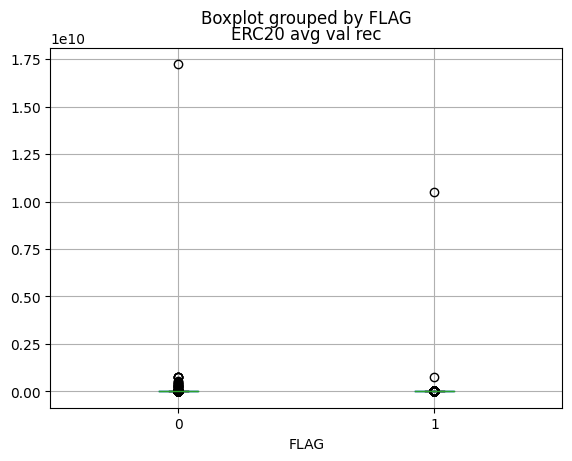

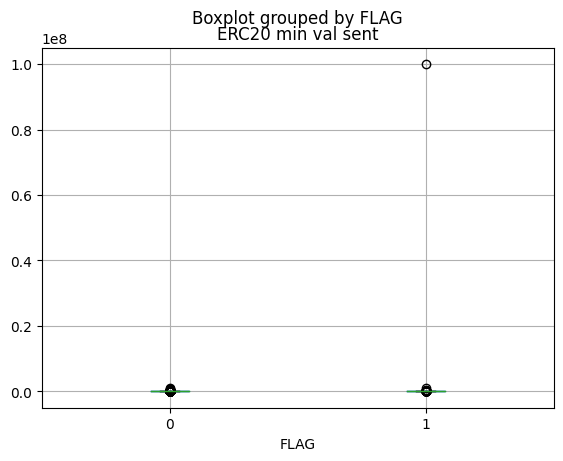

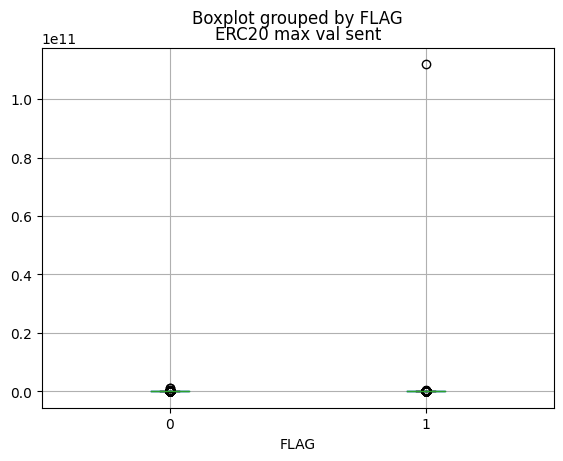

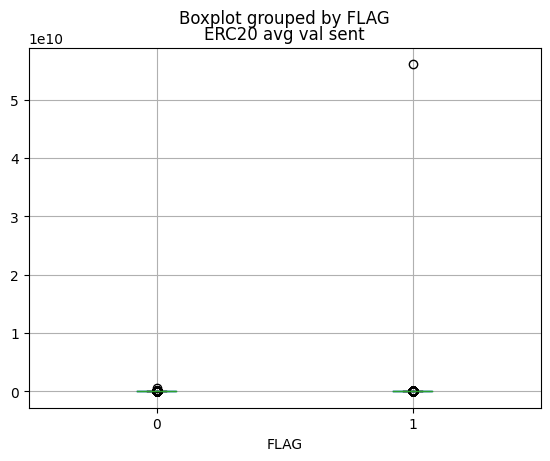

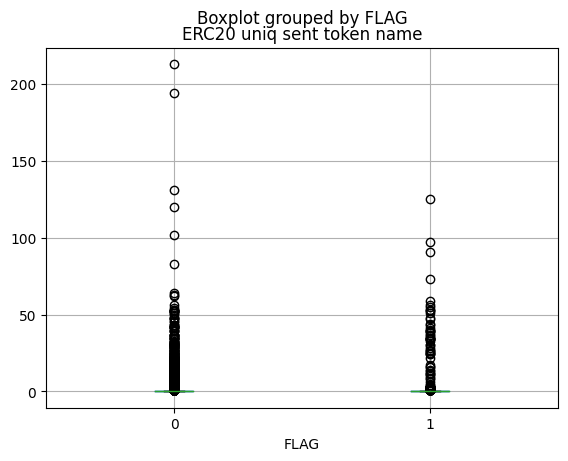

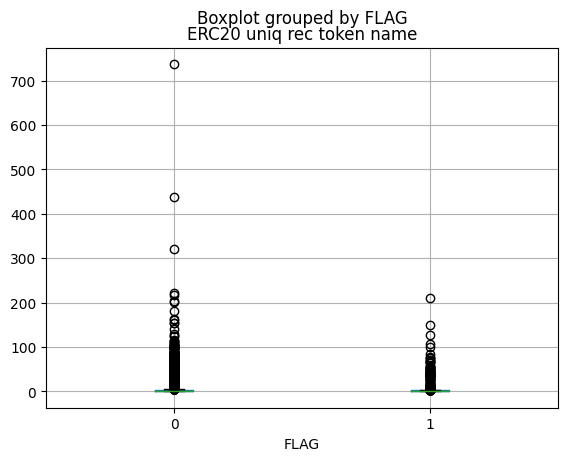

In [17]:
for col in df.columns[1:-2]:
  data.boxplot(column = col, by = 'FLAG')

Both methods cause too much data loss, so it is better not to remove outliers. Especially that outliers may indicate a group "0" FLAG.

### Correlation

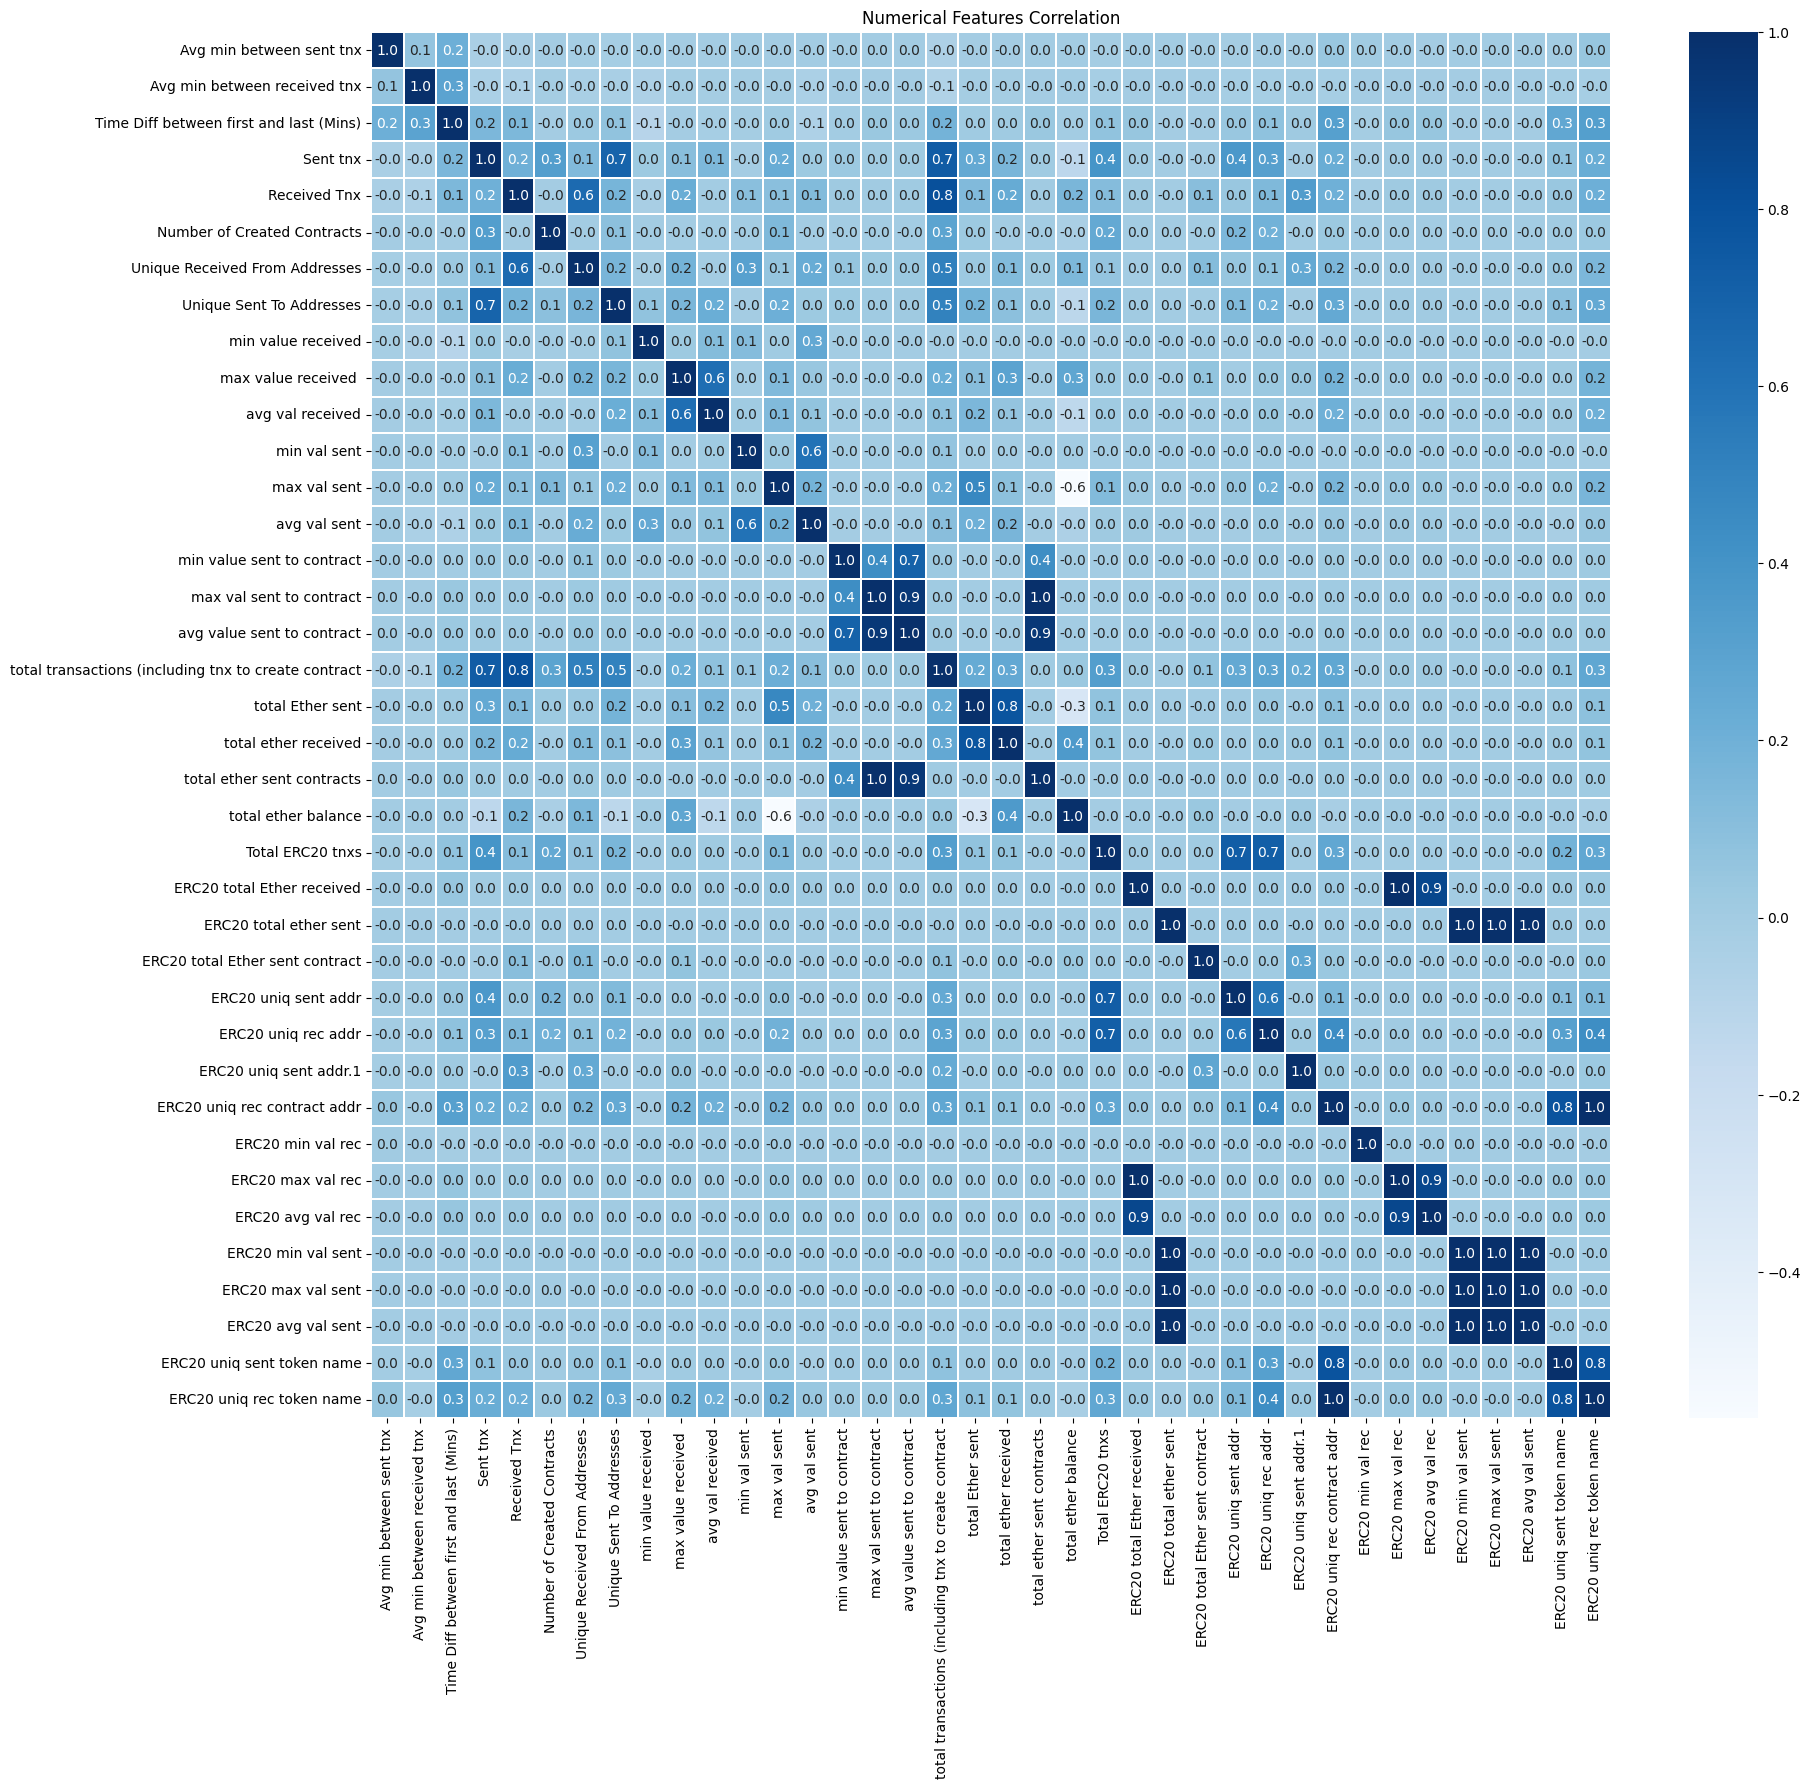

In [18]:
plt.figure(figsize = (20, 18))
sns.heatmap(data[data.columns[1:-2]].corr(), annot = True, fmt=".1f",
            linewidths = 0.1, cmap = 'Blues')
plt.title('Numerical Features Correlation')
plt.show()

### Categorical variables

In [19]:
for col in data.columns[-2:]:
  print(col, ':\n', data[col].unique(), '\n')

ERC20 most sent token type :
 ['Cofoundit' 'Livepeer Token' 'None' 'Raiden' 'StatusNetwork' '0'
 'TenXPay' 'blockwell.ai KYC Casper Token' 'EOS' 'ICO' 'bitqy' 'OmiseGO'
 'SONM' 'BAT' 'Melon' 'Friendz Coin' 'FunFair' 'MKR' 'Golem' 'AION'
 'Aragon' 'TokenCard' 'Crypto.com' 'CRYPTOPUNKS' 'Aigang' 'Bancor' 'ZRX'
 'PangeaCoinICO' 'VeChain' 'Decentraland' 'Mysterium' 'Dochain'
 'SwarmCity' 'BNB' 'Humaniq' 'DGD' 'Storm' 'Patientory' 'NapoleonX'
 'Nexium' 'Qtum' 'district0x' 'Bytom' 'Identity Hub Token' 'Celsius'
 'Reputation' 'Tronix' 'ViteToken' 'Poker Chips' 'MEX' 'Salt' 'Edgeless'
 'SAN' 'TheDAO' 'Telcoin' 'EduCoin' 'DICE' 'Trustcoin' 'Tokenomy'
 'Veritaseum' 'Time New Bank' 'NimiqNetwork' 'Kin' 'UG Token' 'SNGLS'
 'BlockchainPoland' 'Monetha' 'Propy' 'Republic' 'Civic' 'Storj' 'Loom'
 'DATAcoin' 'ChainLink Token' 'Ether Token' 'Guaranteed Entrance Token'
 'Individual Content &amp; Skill Token' 'OWN' 'Populous' 'Sether'
 'Soarcoin' 'AdBank' 'Stox' 'FinShi Capital Tokens' 'Dao.Casino'
 'iXl

In [20]:
cross_tab_cat = pd.crosstab(index=data['ERC20_most_rec_token_type'], columns='freq').sort_values(by='freq', ascending=False).head(10)
cross_tab_cat

col_0,freq
ERC20_most_rec_token_type,
0,4399
OmiseGO,873
Blockwell say NOTSAFU,779
DATAcoin,357
Livepeer Token,207
EOS,161
XENON,145
Golem,126
GSENetwork,80


In [21]:
top_10 = cross_tab_cat.index
data['ERC20_most_rec_token_type'] = data['ERC20_most_rec_token_type'].map(lambda x: 'Other' if x not in top_10 else x)

In [22]:
cross_tab_cat = pd.crosstab(index=data['ERC20 most sent token type'], columns='freq').sort_values(by='freq', ascending=False).head(12)
cross_tab_cat

col_0,freq
ERC20 most sent token type,
0,4399
None,1844
,1191
EOS,138
OmiseGO,134
Golem,130
blockwell.ai KYC Casper Token,126
StatusNetwork,61
BAT,38


In [23]:
top_10 = cross_tab_cat.index
data['ERC20 most sent token type'] = data['ERC20 most sent token type'].map(lambda x: 'Other' if x not in top_10 else x)
data['ERC20 most sent token type'] = data['ERC20 most sent token type'].map(lambda x: '0' if x == " " else x)
data['ERC20 most sent token type'] = data['ERC20 most sent token type'].map(lambda x: '0' if x == 'None' else x)

## Data preprocessing

### Columns trasformation

In [24]:
std_scaler = StandardScaler()
data_num_std = std_scaler.fit_transform(data[data.columns[1:-2]])
data_num_std = pd.DataFrame(data_num_std)
data_num_std.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,-0.205022,-0.306156,1.422068,0.778117,-0.087060,-0.027483,0.028995,0.354232,-0.140887,-0.038621,...,-0.052452,3.076154,-0.028814,-0.010470,-0.018982,-0.011164,0.003173,-0.010243,5.575648,3.125426
1,0.330689,-0.226517,2.973882,-0.036861,-0.171361,-0.027483,-0.087003,-0.049835,-0.140887,-0.041794,...,-0.052452,0.122027,-0.028814,-0.011891,-0.020220,-0.011162,-0.011068,-0.010701,-0.057257,0.130674
2,10.872850,-0.248914,0.853680,-0.156444,-0.169279,-0.027483,-0.070432,-0.096458,-0.140551,-0.041900,...,-0.052452,0.179951,-0.028814,-0.011891,-0.020220,-0.011164,-0.011068,-0.010701,-0.205491,0.190569
3,0.218286,0.321285,0.493485,-0.126548,-0.170320,-0.027483,-0.080374,-0.053720,-0.140887,-0.005263,...,-0.052452,0.353723,-0.028814,-0.011890,-0.020213,-0.011069,-0.011060,-0.010695,-0.057257,0.370254
4,-0.241488,0.104442,0.447896,5.817468,-0.158872,-0.020728,-0.080374,-0.030409,-0.140887,-0.041045,...,-0.052452,1.280508,-0.028814,-0.011883,-0.020197,-0.011164,-0.011030,-0.010678,0.683915,1.328575


In [25]:
ct = ColumnTransformer(transformers=[
      ('num', StandardScaler(), data.columns[1:-2]),
      ('cat', OneHotEncoder(), data.columns[-2:])],
    remainder='passthrough')

data_all_ct = pd.DataFrame(ct.fit_transform(data))
data_all_ct.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,-0.205022,-0.306156,1.422068,0.778117,-0.087060,-0.027483,0.028995,0.354232,-0.140887,-0.038621,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.330689,-0.226517,2.973882,-0.036861,-0.171361,-0.027483,-0.087003,-0.049835,-0.140887,-0.041794,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,10.872850,-0.248914,0.853680,-0.156444,-0.169279,-0.027483,-0.070432,-0.096458,-0.140551,-0.041900,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.218286,0.321285,0.493485,-0.126548,-0.170320,-0.027483,-0.080374,-0.053720,-0.140887,-0.005263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.241488,0.104442,0.447896,5.817468,-0.158872,-0.020728,-0.080374,-0.030409,-0.140887,-0.041045,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### PCA

In [26]:
def pca_print(data_sth):
  pca = PCA(n_components='mle')
  data_pca = pca.fit_transform(data_sth)
  prin_com_col = ['principal component '+ str(i) for i in range(data_pca.shape[1])]
  data_pca = pd.DataFrame(data = data_pca, columns = prin_com_col)

  print('Explained variation: {}'.format(sum(pca.explained_variance_ratio_)))

  return data_pca

Dataset with only numerical columns.

In [27]:
data_num_pca = pca_print(data_num_std)
data_num_pca.head()

Explained variation: 1.0000000000000002


,principal component 0,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,...,principal component 24,principal component 25,principal component 26,principal component 27,principal component 28,principal component 29,principal component 30,principal component 31,principal component 32,principal component 33
0,4.181686,0.037076,-0.258266,0.294443,4.098250,-2.768198,1.653313,0.563084,0.416271,0.345020,...,-1.262962,0.051834,-0.982758,-0.117331,-0.564148,0.006547,-0.021790,-0.000060,0.001784,0.001500
1,0.248164,-0.032263,0.015608,0.146769,0.707786,-0.568206,0.210833,-0.328955,0.843841,0.580481,...,0.084460,-0.077006,-0.061054,-0.033050,0.089362,-0.002094,0.004737,-0.001507,-0.000398,0.000726
2,-0.094612,-0.043767,0.011621,0.139506,1.059463,-0.854503,0.654813,-0.260726,1.264644,1.621351,...,-0.138792,0.075278,-0.045014,-0.005122,-0.098817,0.003188,0.000746,-0.001390,0.000088,-0.000137
3,0.082482,-0.024951,-0.030430,0.046201,0.447426,-0.280424,0.293434,0.006838,0.154235,0.214379,...,0.207024,0.019426,0.187092,0.017918,0.118095,-0.000355,-0.011027,-0.000406,-0.000097,-0.000821
4,3.915862,0.011079,-0.200279,-0.259004,0.094152,0.793696,-0.541035,-0.937344,1.204203,-0.810551,...,-0.145977,3.901125,0.397733,-0.076839,0.061910,-0.000919,-0.029719,-0.000271,-0.000368,-0.007145


Dataset with all columns (categorical included).

In [28]:
data_all_pca = pca_print(data_all_ct)
data_all_pca.head()

Explained variation: 1.0000000000000002


,principal component 0,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,...,principal component 45,principal component 46,principal component 47,principal component 48,principal component 49,principal component 50,principal component 51,principal component 52,principal component 53,principal component 54
0,4.409497,0.037461,-0.243517,0.407710,-4.283077,-2.565600,1.552384,0.596663,0.287459,0.231996,...,-0.021817,-0.013947,-0.012661,-0.007230,0.000713,0.004206,-0.024358,0.001200,0.001577,0.001471
1,0.389383,-0.021044,0.025635,0.188573,-0.893706,-0.672687,0.224996,-0.376198,0.978778,0.624708,...,0.022995,-0.006323,-0.022255,-0.005654,0.006518,-0.000883,0.009739,-0.006328,-0.001195,0.000402
2,-0.036131,-0.039740,0.018500,0.180971,-1.180100,-0.922900,0.633698,-0.345191,1.511834,1.718175,...,-0.016114,-0.002876,0.001523,-0.025205,0.013642,0.002002,-0.002129,0.000893,0.000303,0.000536
3,0.203109,-0.014229,-0.022331,0.076700,-0.597775,-0.362910,0.312588,-0.010927,0.237423,0.260944,...,0.009881,-0.008088,-0.021392,-0.029080,0.012435,-0.001287,-0.001340,-0.002757,-0.000593,-0.001006
4,3.965547,-0.001220,-0.207511,-0.265029,-0.060542,0.774054,-0.506185,-0.978394,1.205339,-0.814458,...,-0.204343,0.098396,0.071135,-0.008467,-0.061577,0.020961,-0.012146,-0.021712,-0.002388,-0.006175


### Train test split data

In [29]:
X_num_train, X_num_test, y_num_train, y_num_test = train_test_split(
    data_num_pca[data_num_pca.columns],
    data['FLAG'],
    test_size=0.33, random_state=42)

In [30]:
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(
    data_all_pca[data_all_pca.columns],
    data['FLAG'],
    test_size=0.33, random_state=42)

### Resampling

In [31]:
data.groupby(['FLAG'])['FLAG'].count() * 100 / len(data)

FLAG
0    84.968266
1    15.031734
Name: FLAG, dtype: float64

Dataset with only numerical columns.

In [32]:
oversample = SMOTE()
X_num_train_os, y_num_train_os = oversample.fit_resample(X_num_train, y_num_train)

In [33]:
print(y_num_train.value_counts())
print()
print(y_num_train_os.value_counts())

0    5119
1     898
Name: FLAG, dtype: int64

1    5119
0    5119
Name: FLAG, dtype: int64


Dataset with all columns (categorical included).

In [34]:
oversample = SMOTE()
X_all_train_os, y_all_train_os = oversample.fit_resample(X_all_train, y_all_train)

In [35]:
print(y_all_train.value_counts())
print()
print(y_all_train_os.value_counts())

0    5119
1     898
Name: FLAG, dtype: int64

1    5119
0    5119
Name: FLAG, dtype: int64


## Models

In [36]:
def my_score(y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  print("Accuracy:", accuracy, "\n"
        "Precision:", precision, "\n"
        "Recall:", recall)

  print("\n Confusion matrix: \n", confusion_matrix(y_test, y_pred))

### KNeighbors model

#### K - value estimate

Dataset with only numerical columns.

In [37]:
k_values = [i for i in range (1,15)]
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_num_train_os, y_num_train_os, cv=3, scoring='recall')
    scores.append(np.mean(score))

Text(0, 0.5, 'Recall Score')

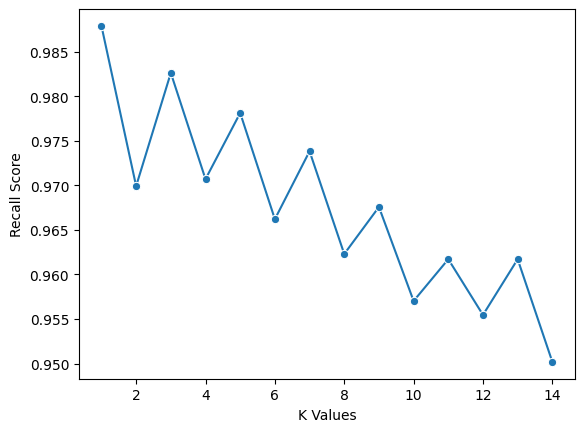

In [38]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Recall Score")

Dataset with all columns (categorical included).

In [39]:
k_values = [i for i in range (1,15)]
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_all_train_os, y_all_train_os, cv=3, scoring='recall')
    scores.append(np.mean(score))

Text(0, 0.5, 'Recall Score')

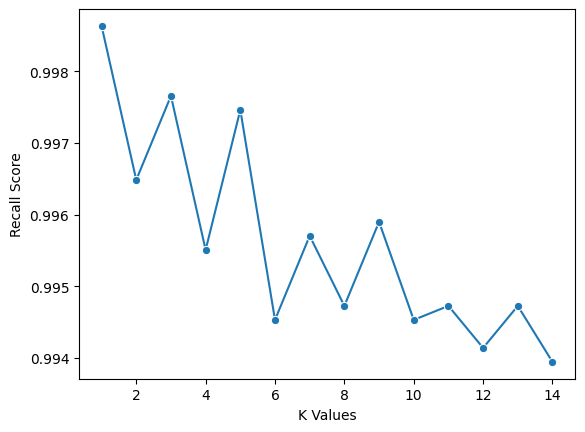

In [40]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Recall Score")

#### Estimation

Dataset with only numerical columns.

In [41]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_num_train_os, y_num_train_os)
y_pred_num = knn.predict(X_num_test)
my_score(y_num_test, y_pred_num)

Accuracy: 0.9406207827260459 
Precision: 0.7793522267206477 
Recall: 0.8517699115044248

 Confusion matrix: 
 [[2403  109]
 [  67  385]]


In [42]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_num_train_os, y_num_train_os)
y_pred_num = knn.predict(X_num_test)
my_score(y_num_test, y_pred_num)

Accuracy: 0.9328609986504723 
Precision: 0.7355679702048417 
Recall: 0.8738938053097345

 Confusion matrix: 
 [[2370  142]
 [  57  395]]


In [43]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_num_train, y_num_train)
y_pred_num = knn.predict(X_num_test)
my_score(y_num_test, y_pred_num)

Accuracy: 0.9524291497975709 
Precision: 0.8765133171912833 
Recall: 0.8008849557522124

 Confusion matrix: 
 [[2461   51]
 [  90  362]]


Dataset with all columns (categorical included).

In [44]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_all_train_os, y_all_train_os)
y_pred_all = knn.predict(X_all_test)
my_score(y_all_test, y_pred_all)

Accuracy: 0.9949392712550608 
Precision: 0.9888143176733781 
Recall: 0.9778761061946902

 Confusion matrix: 
 [[2507    5]
 [  10  442]]


In [45]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_all_train_os, y_all_train_os)
y_pred_all = knn.predict(X_all_test)
my_score(y_all_test, y_pred_all)

Accuracy: 0.9902159244264508 
Precision: 0.9509594882729211 
Recall: 0.9867256637168141

 Confusion matrix: 
 [[2489   23]
 [   6  446]]


### SVM

Dataset with only numerical columns.

In [46]:
clf = svm.SVC(kernel='linear')
clf.fit(X_num_train_os, y_num_train_os)
y_pred_num = clf.predict(X_num_test)
my_score(y_num_test, y_pred_num)

Accuracy: 0.5860323886639676 
Precision: 0.2545915136162128 
Recall: 0.8893805309734514

 Confusion matrix: 
 [[1335 1177]
 [  50  402]]


Dataset with all columns (categorical included).

In [47]:
clf = svm.SVC(kernel='linear')
clf.fit(X_all_train_os, y_all_train_os)
y_pred_all = clf.predict(X_all_test)
my_score(y_all_test, y_pred_all)

Accuracy: 1.0 
Precision: 1.0 
Recall: 1.0

 Confusion matrix: 
 [[2512    0]
 [   0  452]]


### Balanced Logistic Regression

Dataset with only numerical columns.

In [48]:
model = LogisticRegression(solver= 'lbfgs',
                           class_weight='balanced')
model.fit(X_num_train_os, y_num_train_os)
y_pred_num = model.predict(X_num_test)
my_score(y_num_test, y_pred_num)

Accuracy: 0.5937921727395412 
Precision: 0.25360419397116646 
Recall: 0.8561946902654868

 Confusion matrix: 
 [[1373 1139]
 [  65  387]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Dataset with all columns (categorical included).

In [49]:
model = LogisticRegression(solver= 'lbfgs',
                           class_weight='balanced')
model.fit(X_all_train_os, y_all_train_os)
y_pred_all = model.predict(X_all_test)
my_score(y_all_test, y_pred_all)

Accuracy: 0.9996626180836707 
Precision: 0.9977924944812362 
Recall: 1.0

 Confusion matrix: 
 [[2511    1]
 [   0  452]]


## Results

It turned out that the dataset including categorical varaibles have better scores. Two models (Logistic Regression and SVM) have perfect prediction.